In [7]:
# Import packages
from pymongo import MongoClient
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# Connect to db collections
client = MongoClient('mongodb://localhost:27017/')
db = client['address-clustering']
transfers = db['transfers']
transactions = db['transactions']

# Get addresses active on Ethereum and Polygon as a list
users = pd.read_csv('../data/subsets.csv')
user_addresses = list(set(users.loc[users['Polygon'] == 1, 'Address']).union(users.loc[users['Ethereum'] == 1, 'Address']))
user_addresses

['0x8b512915b87824dee52bff27d1935bb8639d4d2c',
 '0x85f6b7b1d64c63978057344a1219466df125f562',
 '0xd7c02b5db97b6b0e36db3ff7c83ec48fd75ada23',
 '0x3bae1b10af5ca69b1530dbe557f9e0190fdf191c',
 '0x9e13e8c907ec7e05c5c6114de79202fc32e30fce',
 '0x509a26cee691d46dc3deb1d93fd57c61a63f70ce',
 '0x096414854dbf64386f2058c415510e4b8afa95f6',
 '0xcef6e5a5e8b750116c10906a9855184502c14de4',
 '0xb7b47d7bbc3c9296a89ef29b8d25c20835e69bde',
 '0x39201f3d8c1b40bb3a591464a5a2ddd267b02e60',
 '0x60c5aeea17f181f4df5fe4f56dba6bbf52a2f3c6',
 '0x84a4e1b3c0054afe46d89d7794a507c23bfe932a',
 '0x4f185ab3750615cc6d7c655954fba25a14bb688f',
 '0x5629575d2dcd94dbdaebbbc74663e5fe979ecaf1',
 '0xd1ebba92cc7bf0a0f1b63a59e6fc075c049ecf49',
 '0x5f134df6b78ce3561eb9a9a298832f97fe97e8ec',
 '0xcd633e2693fbcde2f5ad9698bd16e23f034b6158',
 '0x4ee5e85f7e5366aee67b39e930dd4bc154531d46',
 '0xda72bce03c24bdd9d68ce5c15d255c40701ed3ee',
 '0xeec610a790d78bd7bf78dc40777bffe238a9599c',
 '0xee1a89896c3c1abb53fa78714865a0badf124da4',
 '0x4e61ad720

### Intra-set token transfers

In [4]:
query_conditions = {
    "from": {"$in": user_addresses},
    "to": {"$in": user_addresses}
}

transfer_df = pd.DataFrame(list(transfers.find(query_conditions)))

# Drop duplicates
transfer_df = transfer_df.drop(['_id', 'isSet', 'userAddress'], axis=1).drop_duplicates()#.reset_index()
transfer_df

timeStamp                                               hash  \
0        1662353592  0xb40ea5aa7be6a9bd40a401776a5cbcc79baec55abcd3...   
4        1661006285  0x259b903f6c1ec513b9792768859cea2e429aed92375a...   
8        1661687584  0xf028f85d40cb7ad41a95c40f36772e4fcd1c6b5e6bf3...   
10       1649007251  0x131db9db1de6204423552c97aedf437776e4c27101b9...   
12       1652940559  0x4fa9dea1bfef721568d7aa55140b1f7969344a44c0a7...   
...             ...                                                ...   
2119733  1671413907  0xff4b2d8133986f6b6a9d6bbd88a2bfb1c5abee3648ea...   
2119735  1671413931  0x0635f1dcc46059bfb00d29130914370cbe4bb2c8061a...   
2119737  1671413955  0xe4dde48b270b76854b461748dfc1c0f5fd0cc986a4ef...   
2119739  1652154158  0x085c04dacb55543e2333f84395b3ae93b8631c69d57f...   
2119741  1659443472  0xd37d3918b9dae7d2649ae23e3d833239a86c3e2aa9f9...   

                                               from  \
0        0x000000085d9a759bb5c3d459d638739c0f48deb0   
4        0x000000085d9a759bb5c3d459d638739c0f48deb0   
8        0x00009dc8aac69accf38e87ab42a82a28be68f2a0   
10       0x00009dc8aac69accf38e87ab42a82a28be68f2a0   
12       0x00009dc8aac69accf38e87ab42a82a28be68f2a0   
...                                             ...   
2119733  0xfffea9b28702bdc5fa77efc33ec87b8f65a73eb7   
2119735  0xfffea9b28702bdc5fa77efc33ec87b8f65a73eb7   
2119737  0xfffea9b28702bdc5fa77efc33ec87b8f65a73eb7   
2119739  0xffffca7879d31e91047d37193a5b806f5f791848   
2119741  0xffffca7879d31e91047d37193a5b806f5f791848   

                                                 to  \
0        0x000000085d9a759bb5c3d459d638739c0f48deb0   
4        0x60ab31673485542e3ca55ba3a42c693863caff10   
8        0x00009dc8aac69accf38e87ab42a82a28be68f2a0   
10       0x03ba161f99e0561adc546644640ba6d5602d86c8   
12       0x0749d1abb5ca9128432b612644c0ea1e9c6cc9af   
...                                             ...   
2119733  0x799efb3e3568d40468467722eae51e5f6765b5fa   
2119735  0x799efb3e3568d40468467722eae51e5f6765b5fa   
2119737  0x799efb3e3568d40468467722eae51e5f6765b5fa   
2119739  0x16efdf4ef182a5b82221fed14f4c3996922d00e2   
2119741  0x16efdf4ef182a5b82221fed14f4c3996922d00e2   

                                    contractAddress  value  nonce  \
0        0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85           262   
4        0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85            76   
8        0x8f3cf7ad23cd3cadbd9735aff958023239c6a063   0.11     61   
10       0x493a5bad290b6f5a750e180d48074f1de31aec47          7433   
12       0xfdac3c4ffccb6e05d3e9a9d69ec95edeb6e8c844         31220   
...                                             ...    ...    ...   
2119733  0xb854bf4d15be8e1f9b38e8b6af7d3283b81edfd8         40309   
2119735  0xbcbdf467b5530d85b792d9e8afb109d7d1ac32c4         59757   
2119737  0x873c11f798fc6f6c370c40f460aae4e20069b105         96970   
2119739  0xdac17f958d2ee523a2206206994597c13d831ec7  100.0     27   
2119741  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2    1.0     37   

                                tokenName     gasPrice  gasUsed chainName  \
0                   Ethereum Name Service  11669714414    35891  Ethereum   
4                   Ethereum Name Service  10898502261   525347  Ethereum   
8                    (PoS) Dai Stablecoin  30000068397    32562   Polygon   
10       DAZZLE Fashion 2022 MVFW Catwalk  35150000000   271656   Polygon   
12                 AO  2022 - Accessories  37064012768   272721   Polygon   
...                                   ...          ...      ...       ...   
2119733           ICE Poker SNG Wearables  61922750388   145726   Polygon   
2119735                    FOMO Bro NFTee  64081415590   137287   Polygon   
2119737     Roland Lifestyle DCLMVMF 2022  64737010321   162802   Polygon   
2119739                        Tether USD  49354171902    46085  Ethereum   
2119741                     Wrapped Ether  11131035260    29682  Ethereum   

         tokenType                           

### Intra-set native transfers

In [5]:
query_conditions = {
    "input": "0x",
    "from": {"$in": user_addresses},
    "to": {"$in": user_addresses}
}

transaction_df = pd.DataFrame(list(transactions.find(query_conditions)))

# Drop id column
transaction_df = transaction_df.drop(['_id'], axis=1).drop_duplicates()#.reset_index()

transaction_df

hash  \
0       0x67c44a94c7fa3deb18b52c8725daf4e1285028a88201...   
1       0xd1870ec270e664b83bc7206d438ecbe8b61284dfa174...   
2       0x5d04935633af10fb3f2161f7c0328934145cbea17375...   
3       0x1060eb7fa78e1e3604c2e0150fff45f3224a437ec5c8...   
4       0x68f79a067b1bf334e9e1634bc04e49ede5255d57e6c3...   
...                                                   ...   
302857  0xb518d37f14b802ce6bfb87f03122ed5fc6ff6e6a09df...   
302858  0x79a8b4dee4dc50a7a88909e96dde5e803aea6f24e470...   
302859  0xfdc531ff5f7fc6e5282c15fa896491bae24a7e1b585f...   
302860  0xa56b5803be966f4d521244e03380198a5a5ac8401733...   
302861  0x588761fcedee03ef8f25562a65069cc475a94c3cdf67...   

                                              from  \
0       0x000000085d9a759bb5c3d459d638739c0f48deb0   
1       0x000000085d9a759bb5c3d459d638739c0f48deb0   
2       0x000000085d9a759bb5c3d459d638739c0f48deb0   
3       0x000000085d9a759bb5c3d459d638739c0f48deb0   
4       0x000000085d9a759bb5c3d459d638739c0f48deb0   
...                                            ...   
302857  0xfffc3e3e4f27e609433ab9dfb50cb2bdef1ba4f8   
302858  0xfffc804dd1175bb079c0ee11593493df60d24c97   
302859  0xfffc804dd1175bb079c0ee11593493df60d24c97   
302860  0x16efdf4ef182a5b82221fed14f4c3996922d00e2   
302861  0xa8f57f3dd0fccd9b1e19d9c039b0869a092aaab2   

                                                to   timeStamp  nonce  \
0       0x000000085d9a759bb5c3d459d638739c0f48deb0  1686282535  189.0   
1       0x000000085d9a759bb5c3d459d638739c0f48deb0  1688893903  204.0   
2       0x000000085d9a759bb5c3d459d638739c0f48deb0  1688986319  205.0   
3       0x000000085d9a759bb5c3d459d638739c0f48deb0  1688993888  206.0   
4       0x000000085d9a759bb5c3d459d638739c0f48deb0  1688994700  207.0   
...                                            ...         ...    ...   
302857  0xfffc3e3e4f27e609433ab9dfb50cb2bdef1ba4f8  1640826618   41.0   
302858  0xfffc804dd1175bb079c0ee11593493df60d24c97  1624801813   48.0   
302859  0xfffc804dd1175bb079c0ee11593493df60d24c97  1619893785   46.0   
302860  0xffffca7879d31e91047d37193a5b806f5f791848  1659260765  131.0   
302861  0xffffca7879d31e91047d37193a5b806f5f791848  1621229017    0.0   

               value      gasPrice input  gasUsed functionName chainName  
0       0.000000e+00  167262761118    0x    21000                Polygon  
1       0.000000e+00   67000000000    0x    21000                Polygon  
2       0.000000e+00  110000000000    0x    21000                Polygon  
3       0.000000e+00  102000000000    0x    21000                Polygon  
4       0.000000e+00   87000000000    0x    21000                Polygon  
...              ...           ...   ...      ...          ...       ...  
302857  0.000000e+00  106666666666    0x    21000                Polygon  
302858  0.000000e+00   63800000000    0x    21000               Ethereum  
302859  4.804222e+17   43000000000    0x    21000               Ethereum  
302860  1.000000e+18    4759274510    0x    21000               Ethereum  
302861  7.500000e+16   81000000000    0x    21000               Ethereum  

[210548 rows x 11 columns]

### All intra-set transfers

In [73]:
all = pd.concat([transaction_df, transfer_df], ignore_index=True)

all['timeStamp'] = pd.to_datetime(all['timeStamp'], unit='s')  # Convert UNIX timestamps to datetime
all['hour_of_day'] = all['timeStamp'].dt.hour + all['timeStamp'].dt.minute/60  # Extract the time of the day in hours

all

hash  \
0        0x67c44a94c7fa3deb18b52c8725daf4e1285028a88201...   
1        0xd1870ec270e664b83bc7206d438ecbe8b61284dfa174...   
2        0x5d04935633af10fb3f2161f7c0328934145cbea17375...   
3        0x1060eb7fa78e1e3604c2e0150fff45f3224a437ec5c8...   
4        0x68f79a067b1bf334e9e1634bc04e49ede5255d57e6c3...   
...                                                    ...   
1185021  0xff4b2d8133986f6b6a9d6bbd88a2bfb1c5abee3648ea...   
1185022  0x0635f1dcc46059bfb00d29130914370cbe4bb2c8061a...   
1185023  0xe4dde48b270b76854b461748dfc1c0f5fd0cc986a4ef...   
1185024  0x085c04dacb55543e2333f84395b3ae93b8631c69d57f...   
1185025  0xd37d3918b9dae7d2649ae23e3d833239a86c3e2aa9f9...   

                                               from  \
0        0x000000085d9a759bb5c3d459d638739c0f48deb0   
1        0x000000085d9a759bb5c3d459d638739c0f48deb0   
2        0x000000085d9a759bb5c3d459d638739c0f48deb0   
3        0x000000085d9a759bb5c3d459d638739c0f48deb0   
4        0x000000085d9a759bb5c3d459d638739c0f48deb0   
...                                             ...   
1185021  0xfffea9b28702bdc5fa77efc33ec87b8f65a73eb7   
1185022  0xfffea9b28702bdc5fa77efc33ec87b8f65a73eb7   
1185023  0xfffea9b28702bdc5fa77efc33ec87b8f65a73eb7   
1185024  0xffffca7879d31e91047d37193a5b806f5f791848   
1185025  0xffffca7879d31e91047d37193a5b806f5f791848   

                                                 to           timeStamp  \
0        0x000000085d9a759bb5c3d459d638739c0f48deb0 2023-06-09 03:48:55   
1        0x000000085d9a759bb5c3d459d638739c0f48deb0 2023-07-09 09:11:43   
2        0x000000085d9a759bb5c3d459d638739c0f48deb0 2023-07-10 10:51:59   
3        0x000000085d9a759bb5c3d459d638739c0f48deb0 2023-07-10 12:58:08   
4        0x000000085d9a759bb5c3d459d638739c0f48deb0 2023-07-10 13:11:40   
...                                             ...                 ...   
1185021  0x799efb3e3568d40468467722eae51e5f6765b5fa 2022-12-19 01:38:27   
1185022  0x799efb3e3568d40468467722eae51e5f6765b5fa 2022-12-19 01:38:51   
1185023  0x799efb3e3568d40468467722eae51e5f6765b5fa 2022-12-19 01:39:15   
1185024  0x16efdf4ef182a5b82221fed14f4c3996922d00e2 2022-05-10 03:42:38   
1185025  0x16efdf4ef182a5b82221fed14f4c3996922d00e2 2022-08-02 12:31:12   

           nonce  value      gasPrice input  gasUsed functionName chainName  \
0          189.0    0.0  167262761118    0x    21000                Polygon   
1          204.0    0.0   67000000000    0x    21000                Polygon   
2          205.0    0.0  110000000000    0x    21000                Polygon   
3          206.0    0.0  102000000000    0x    21000                Polygon   
4          207.0    0.0   87000000000    0x    21000                Polygon   
...          ...    ...           ...   ...      ...          ...       ...   
1185021  40309.0          61922750388   NaN   145726          NaN   Polygon   
1185022  59757.0          64081415590   NaN   137287          NaN   Polygon   
1185023  96970.0          64737010321   NaN   162802          NaN   Polygon   
1185024     27.0  100.0   49354171902   NaN    46085          NaN  Ethereum   
1185025     37.0    1.0   11131035260   NaN    29682          NaN  Ethereum   

                                    contractAddress  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
1185021  0xb854bf4d15be8e1f9b38e8b6af7d3283b81edfd8   
1185022  0xbcbdf467b5530d85b792d9e8afb109d7d1ac32c4   
1185023  0x873c11f798fc6f6c370c40f460aae4e20069b105   
1185024  0xdac17f958d2ee523a2206206994597c13d831ec7   
1185025  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

                             tokenName  tokenType  \
0                                  NaN        NaN   
1                              

### Cluster based on Ether transactions

In [72]:
# create a directed graph from your dataframe
ether_transactions = transaction_df[transaction_df['chainName']=='Ethereum']

G = nx.from_pandas_edgelist(ether_transactions, 'from', 'to', create_using=nx.Graph())

# find connected components (clusters)
clusters = list(nx.connected_components(G))

clusters_dict = {}

# print clusters
for i, cluster in enumerate(clusters):
    clusters_dict[f"Cluster {i+1}"] = cluster


# get unique values from 'from' and 'to' fields
from_unique = transaction_df['from'].unique()
to_unique = transaction_df['to'].unique()
all_unique = np.union1d(from_unique, to_unique)
num_unique_addresses = len(all_unique)
print(num_unique_addresses)

print(clusters_dict)

44888
{'Cluster 1': {'0x000000085d9a759bb5c3d459d638739c0f48deb0'}, 'Cluster 2': {'0x0000000a7e98d4b406403701025ca41e6251c91d'}, 'Cluster 3': {'0x0000000df24d1de30e8b5b9be481ecfc35c834f0'}, 'Cluster 4': {'0x0019029a85a5a0fe786c722b1e92e75499f9a76f', '0x00014ed7e7d51fd03a95fd5fbaf6098e5fe17bff', '0xa6566c6e1fdabf2a5ba40f1c336ea25bdfcfa9f3', '0x0000baa55a9c2a06a3922c563d8d9fcb1a0dbf2f', '0x0001244fb289b702f7b7dcd83c0188bbfedefc09', '0xf14364b58254a279afbb38e3bc4ea951c6e7240e', '0xdba843151831cc30e42e5561ec8aa05eaf60cd90', '0x5b205fa995d7fe092b22b5ad6f89a65c7a9711ab', '0x260f900b5e6c7cc367b35165ea71a924e1bd87f0', '0x00009dc8aac69accf38e87ab42a82a28be68f2a0', '0xa382bb56db82c6d914880cea7762ce87b5095bb9', '0x1614ac43e5b936eafff571502f0f87fcbab44c7f', '0xb8d4467428fc490657142d2a798afebb12f062e4', '0x387d03f93b55550a65738123cffd7d530851457e', '0x747d62948ba0dca7a57607253bd1086a6fa33784', '0x1a2e612e59cd354997686eb4d23c2775a4c23ddc', '0x903264ce47ba7e3e385336dd582f9c6899d137e5', '0x762b86f85ff

In [68]:
addresses = clusters_dict["Cluster 420"]
addresses
# df = all[all['from'].isin(addresses)]
# df

{'0x06038b3baff67b3fa986be8753911c0a1dbb4eac',
 '0x33abbe4e5aa3eb29bfe54f10026edfe756b2ba41'}

### Display time-of-day for specific cluster

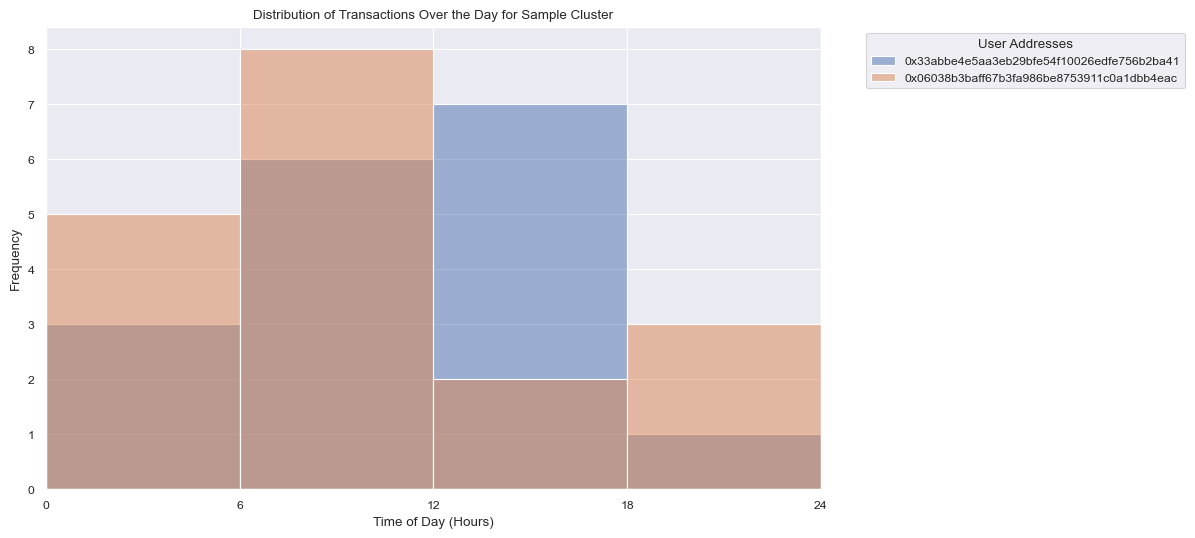

In [70]:
# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(addresses)))

plt.figure(figsize=[10,6])

bins = np.linspace(0, 24, num=5)

# Plot histogram for each user address
for address in addresses:
    subset = all[all['from'] == address]
    sns.histplot(subset['hour_of_day'], bins=bins, label=address, alpha=0.5)

sns.set_theme(context='paper')
plt.xlabel('Time of Day (Hours)')
plt.xticks(bins)
plt.ylabel('Frequency')
plt.xlim((0,24))
plt.title('Distribution of Transactions Over the Day for Sample Cluster')
plt.legend(title='User Addresses', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside of plot
plt.show()